In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

使用线性同余发生器生成随机数,这种方法生成出来的随机数，是近似服从于均匀分布的伪随机数,其迭代公式如下
$$
x_n=a*x_{n-1}+c (mod M)
$$

In [20]:

def LCG(seed=92,a=314159269,c=453806245,M=2**31):
    while True:
        seed=(seed*a+c)%M    
        yield seed
            
maker=LCG()
for _ in range(10):
    print(next(maker))

1439171569
852869882
1334383559
1691228136
1526296877
791046822
639067555
650910388
1661566633
1633704850


上面的这个函数实现了一个最简单的LCG。

由于用到了取余运算且生成的随机数依赖于前一项，随机数序列是具有周期性的。若要使周期T=M，则需要a,c,M满足以下三个条件：

- c与M互素
- 对于M的任何一个素数因子，a-1被P整除
- 若4是M的因子，则a-1被4整除

这里使用的是Kobayashi和Shoshichi提出的发生器，周期为$2^{31}$

0.5075777999926359
0.0840420604160129


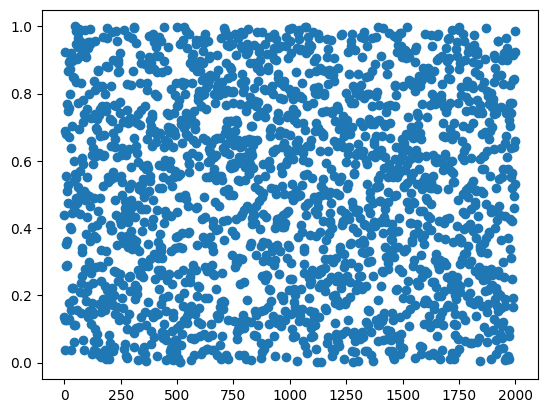

In [30]:
m=[next(maker)/2**31 for i in range(2000) ]# 生成2000个缩放到[0,1]区间上的伪随机数
n=[i for i in range(2000)]
print(np.mean(m))#期望
print(np.var(m))#方差
plt.scatter(n,m)

由于已经将随机数缩放到[0,1]区间上，若生成的随机数符合U(0,1)分布，则其期望，方差也应当接近0.5和0.083

从结果上来看，LCG生成的随机数基本符合U(0,1)分布

In [34]:
def PCG(seed=7,a=16807):
    '''
    a=16807,397204094,764261123,630360016
    这4个数字都可以作为a的取值
    '''
    while True:
        seed=(a*seed)%2**31
        yield seed


maker=PCG()
for _ in range(10):
    print(next(maker))

16807
282475249
1622647863
947787489
1578110407
1878557649
613813847
2005365185
1564292583
1570623665


当LCG中的c=0，我们称其为乘同余发生器。

上面实现的素数模同余发生器，就是一种使用较多的随机数发生器，其公式如下所示：

$$
x_n=a*x_{n-1}(mod M),n=1,2,3,4...
$$

上面实现的素数模乘同余发生器由Lewis-Goodman-Miller在1969年提出，这类发生器的周期为$2^{31}-1$

0.487361595377326
0.08481332655830025


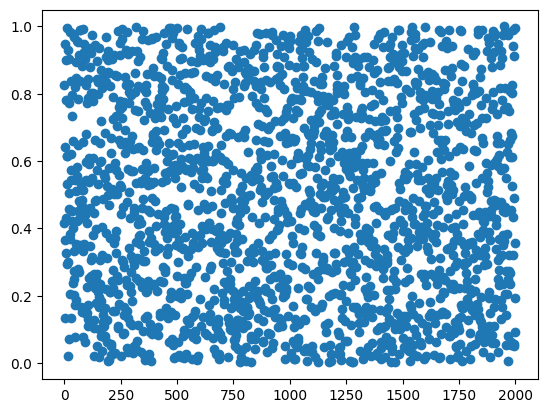

In [39]:
m=[next(maker)/2**31 for i in range(2000) ]# 生成2000个缩放到[0,1]区间上的伪随机数
n=[i for i in range(2000)]
print(np.mean(m))#期望
print(np.var(m))#方差
plt.scatter(n,m)

可以看到素数模同余发生器同样可以生成性质良好的伪随机数